In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("zk_protocol_contributors.csv")
df.head()

,repo,username,contributions
0,mir-protocol/plonky2,wborgeaud,1359
1,mir-protocol/plonky2,npwardberkeley,1107
2,mir-protocol/plonky2,dlubarov,961
3,mir-protocol/plonky2,typ3c4t,410
4,mir-protocol/plonky2,Nashtare,303


In [3]:
# Get total unique contributors (across all repos)
total_unique_contributors = df["username"].nunique()
print(f"Total unique contributors across all ZK repos: {total_unique_contributors}")

Total unique contributors across all ZK repos: 139


In [4]:
# Get unique contributor count per repo
repo_contributor_counts = df.groupby("repo")["username"].nunique().reset_index()
repo_contributor_counts.columns = ["repo", "unique_contributors"]

# Calculate average headcount per team
average_headcount = repo_contributor_counts["unique_contributors"].mean()
print(f"\nAverage team size across repos: {average_headcount:.2f}")

display(repo_contributor_counts)
# Most likely locked at 30 contributors per repo because I hit the free github API limit


Average team size across repos: 30.00


,repo,unique_contributors
0,a16z/jolt,30
1,mir-protocol/plonky2,30
2,risc0/risc0,30
3,succinctlabs/sp1,30
4,zcash/halo2,30


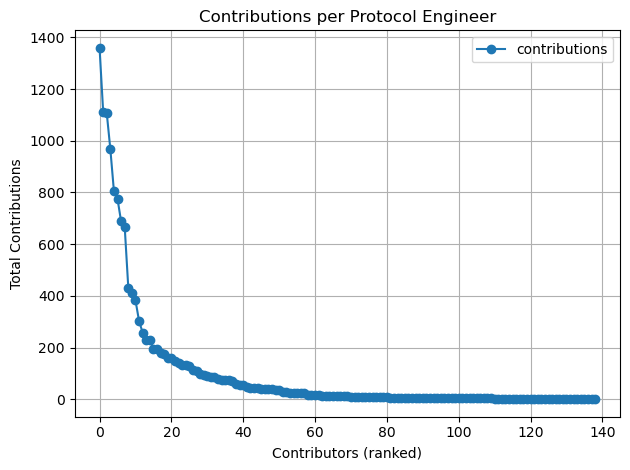

In [5]:
df.groupby("username")["contributions"].sum().sort_values(ascending=False).reset_index().plot(
    y="contributions", use_index=True, marker="o", title="Contributions per Protocol Engineer"
)
plt.ylabel("Total Contributions")
plt.xlabel("Contributors (ranked)")
plt.grid(True)
plt.tight_layout()
plt.show()


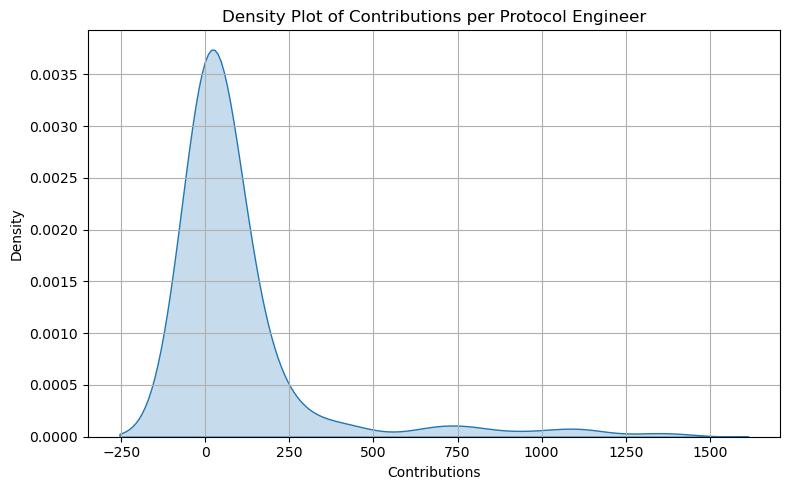

In [8]:
import seaborn as sns

contribs = df.groupby("username")["contributions"].sum()

plt.figure(figsize=(8, 5))
sns.kdeplot(contribs, fill=True)
plt.title("Density Plot of Contributions per Protocol Engineer")
plt.xlabel("Contributions")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()
